In [35]:
import pandas as pd
import pandas_profiling as pp
from tabulate import tabulate
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
uk_data = pd.read_excel(r"C:\Users\Jomon\OneDrive\Desktop\hackathon\ABI vehicle_data (all 2016+).xlsx")

### Top 25 Manufactures


In [41]:
uk_man=uk_data['Manufacturer'].value_counts().reset_index().rename(columns={'index':'Manufacturer','Manufacturer':'Count'})[0:25]
uk_man
fig = go.Figure(go.Bar(
    x=uk_man['Manufacturer'],y=uk_man['Count'],
    marker={'color': uk_man['Count'], 
    'colorscale': 'Viridis'},  
    text=uk_man['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 25 Manufactures',xaxis_title="Manufacutures ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

## Top 20 Models

In [45]:
df_Model=uk_data['Model'].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'})[0:20]

fig = go.Figure(go.Bar(
    x=df_Model['Model'],y=df_Model['Count'],
    marker={'color': df_Model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 20 Model',xaxis_title="Model ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

### Transmision distribution

In [52]:
df_Transmission=uk_data['Transmission Type'].value_counts().reset_index().rename(columns={'index':'Transmission Type','Transmission Type':'Count'})
df_Transmission
fig = px.pie(df_Transmission, values='Count', names='Transmission Type')

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')
fig.update_layout(title="Transmission Distribution",title_x=0.5)
fig.show()

In [55]:
df_Transmission=uk_data['Transmission Type'].value_counts().reset_index().rename(columns={'index':'Transmission Type','Transmission Type':'Count'})

fig = go.Figure(go.Bar(
    x=df_Transmission['Transmission Type'],y=df_Transmission['Count'],
    marker={'color': df_Transmission['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Transmission['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Transmission Distribution ',xaxis_title="Transmission ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

### Fuel Type against Manufacture

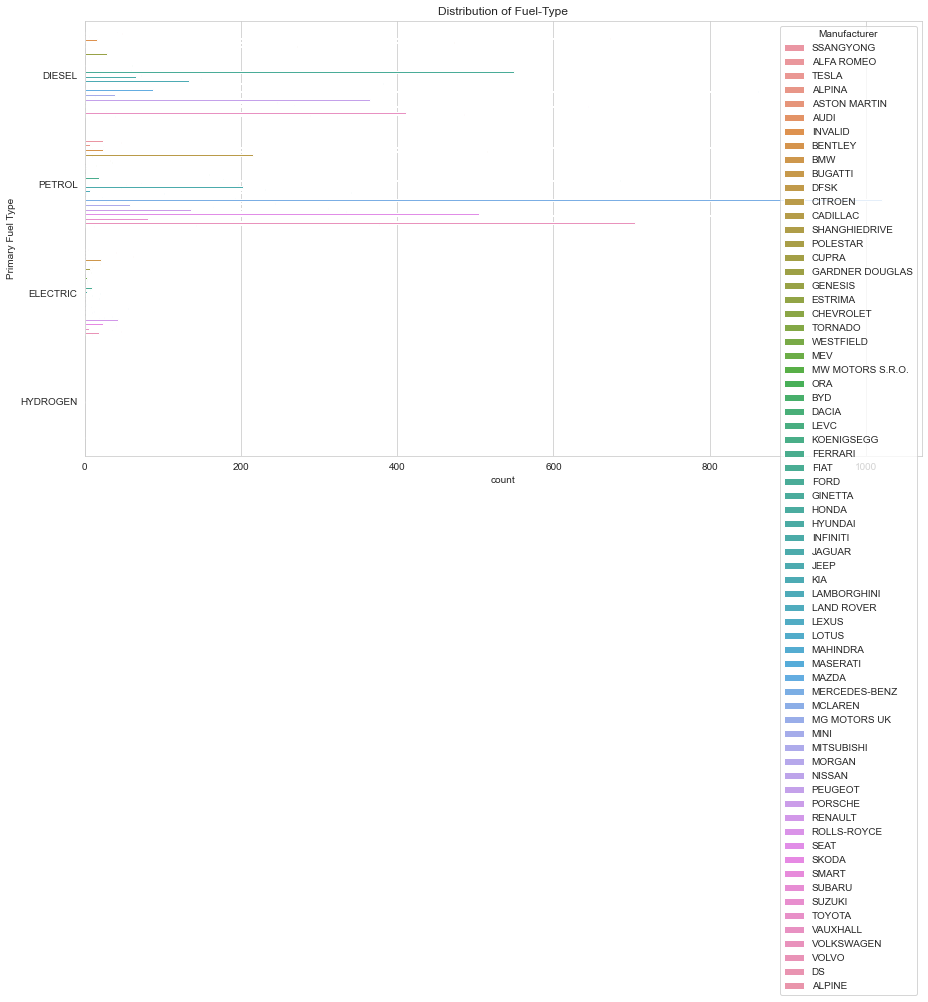

In [76]:
plt.figure(figsize = (15,8))
sns.countplot(y="Primary Fuel Type", data=uk_data, hue='Manufacturer')
plt.title('Distribution of Fuel-Type')
plt.show()

### Variation in CO2 emissions with Manufacture

Text(0, 0.5, 'CO2 Emissions(g/km)')

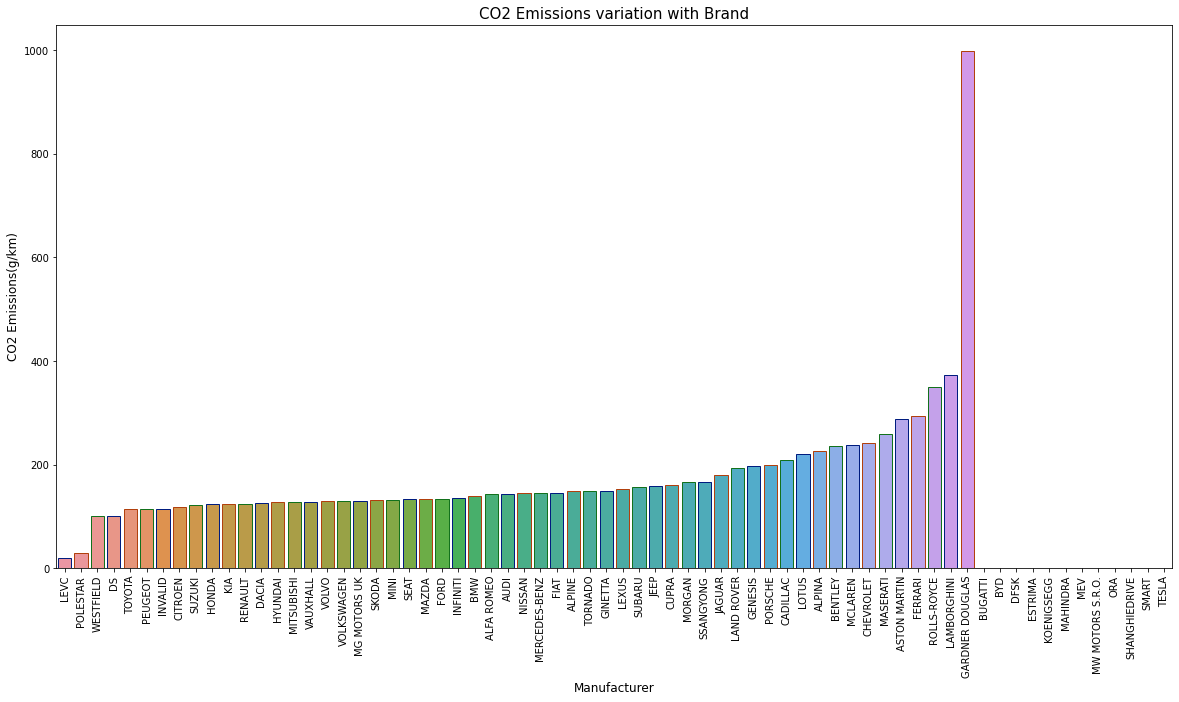

In [44]:
CO2_man = uk_data.groupby(['Manufacturer'])['CO2 Emissions G/KM'].mean().sort_values().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x = "Manufacturer",y="CO2 Emissions G/KM",data = CO2_man,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('Manufacturer', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

1. The vehicle of class GARDNER DOUGLAS has the highest CO2 emissions among all. And LEVC has the lowest CO2 emissions.
2. There are more than 10 types of vehicle class that has similar CO2 emission.

### Variation in CO2 emissions with Transmission

Text(0, 0.5, 'CO2 Emissions(g/km)')

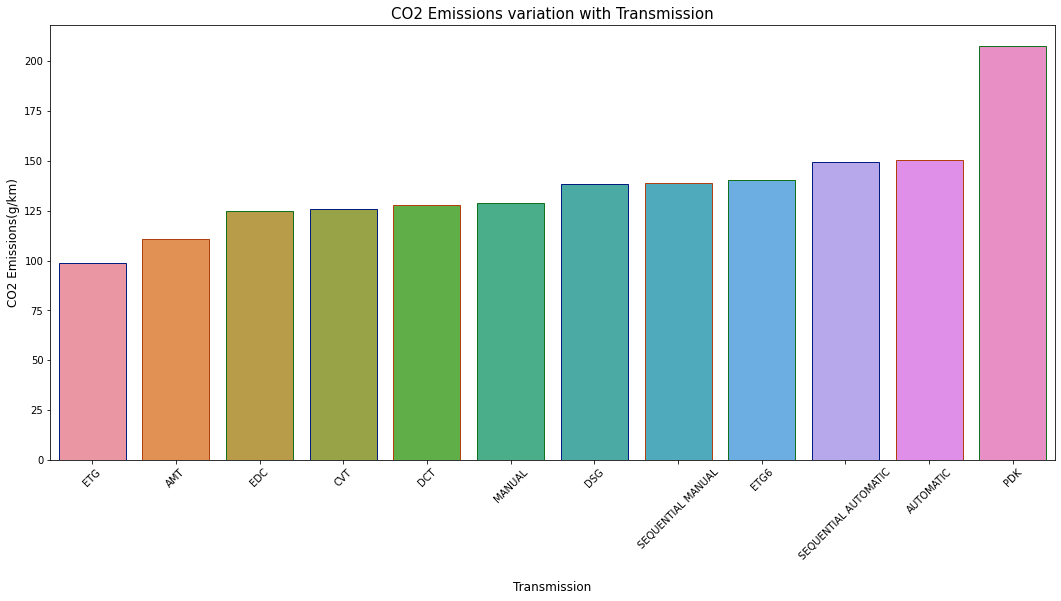

In [22]:
CO2_transmission = uk_data.groupby(["Transmission Type"])['CO2 Emissions G/KM'].mean().sort_values().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "Transmission Type",y="CO2 Emissions G/KM", data = CO2_transmission,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('\nTransmission', fontsize=12)
plt.xticks(rotation = 45)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

1. Vehicles with PDK transmission exhibit highest CO2 emissions and vehicle with ETG Transmission shows the lowest CO2 emissions.
2. CO2 emissions of Automatic, Manual,Sequential Automatic,DSG,CVT,EDC,ETG6 and Automatic vehicles has almost similar CO2 emissions.

### Variation in CO2 emissions with Fuel Type

Text(0, 0.5, 'CO2 Emissions(g/km)')

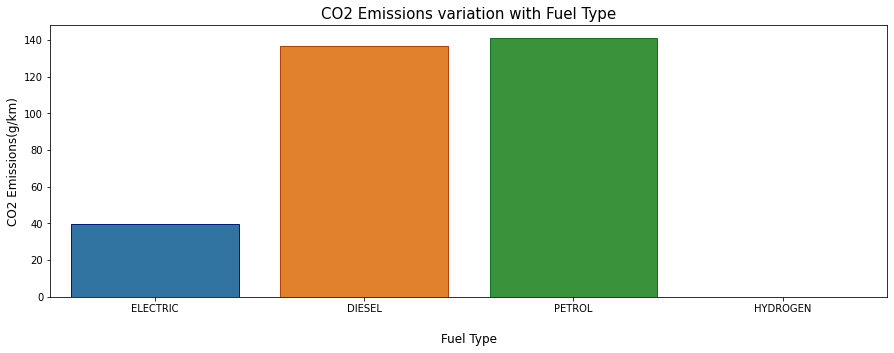

In [25]:
CO2_fuel_type = uk_data.groupby(['Primary Fuel Type'])['CO2 Emissions G/KM'].mean().sort_values().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Primary Fuel Type",y="CO2 Emissions G/KM",data = CO2_fuel_type,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

1. Cars running on Petrol has the highest CO2 emissions with almost all the values higher than the sample mean CO2 emissions.
2. Hydrogen Fuel has the lowest CO2 emissions, but there is only 2 vehicle that use it as fuel. Other than that electric vehicle has the lowest CO2 emissions with almost 29% values less than sample mean.
3. The mean CO2 emissions of fuel type Deisel and Petrol has almost similar mean.

### Variation in CO2 emissions with Engine Capacity

Text(0, 0.5, 'CO2 Emissions(g/km)')

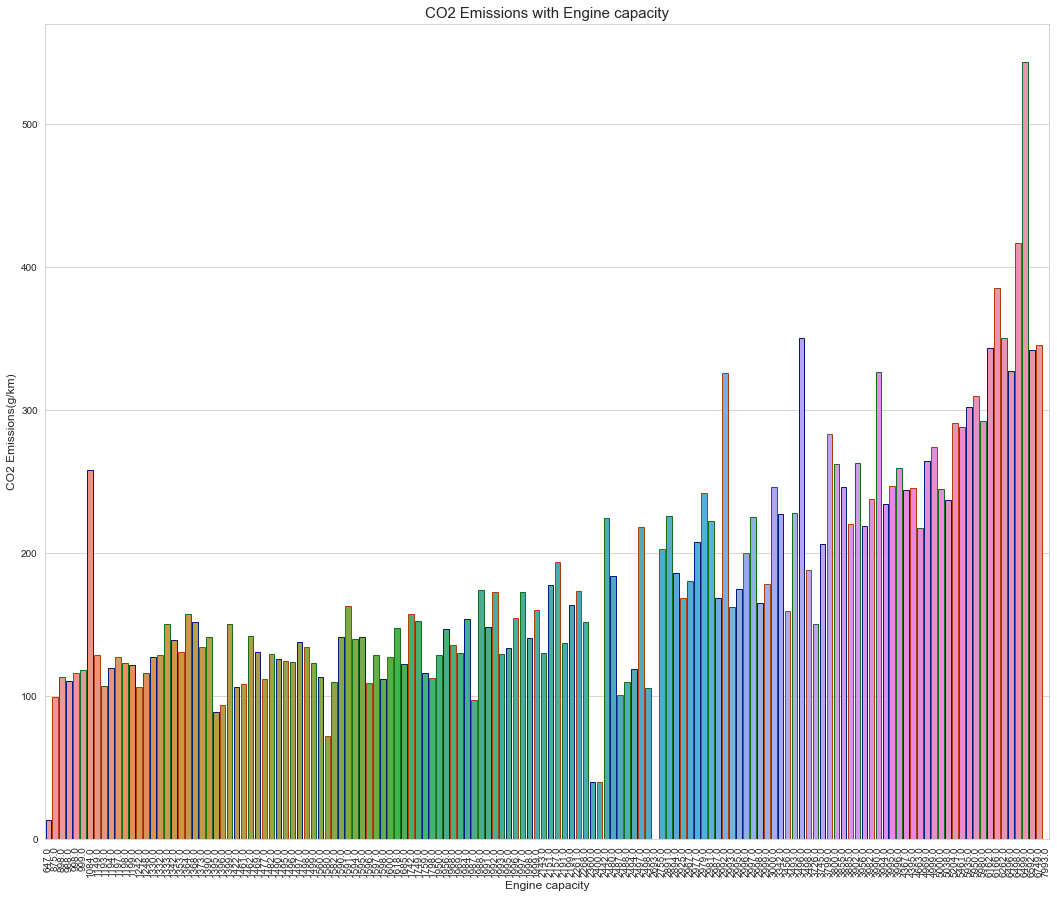

In [240]:
CO2_CC = uk_data.groupby(['Cubic Capacity'])['CO2 Emissions G/KM'].mean().reset_index()

plt.figure(figsize=(18,15))
sns.barplot(x = "Cubic Capacity",y="CO2 Emissions G/KM",data = CO2_CC,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine capacity', fontsize=15)
plt.xlabel('Engine capacity', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

### Engine capacity vs Manufacturer

In [66]:
fig = px.histogram(uk_data, x="Cubic Capacity", color="Manufacturer", nbins=8, text_auto=True)
fig.show()

### Average Co2 emission of each manufacturer across Years

In [219]:
co2_by_year = uk_data.groupby(['Nominal Start Year','Manufacturer']).mean().reset_index()
co2_by_year=co2_by_year[['Nominal Start Year','Manufacturer','CO2 Emissions G/KM']]

fig_bar = px.histogram(co2_by_year, x="Manufacturer", y="CO2 Emissions G/KM", color="Manufacturer",
                 animation_frame="Nominal Start Year",
                 range_y=[0,500],
                 color_discrete_sequence=px.colors.qualitative.T10)
fig_bar.update_yaxes(showgrid=False),
fig_bar.update_xaxes(categoryorder='total descending')
fig_bar.update_traces(hovertemplate=None)
fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        #legend=dict(orientation="h", yanchor="bottom", y=1., xanchor="right", x=1)
                          )
fig_bar.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))
fig_bar.show()